# PROJECT 4.2 HEART DISEASE
## `DATA EXPLORATION AND  PART 1`

This module is to apply DecisionTreeClassifier to specify the important features from preprocessing data

### Import Library

In [3]:
import errno

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

## LOAD DATA

In [5]:
def data_loader(path):
    """
    minor function to collect train, validation and test data with error check
    :param path:
    :return:
    """
    try:
        train_data = pd.read_csv(path + "prp_train.csv")
        test_data = pd.read_csv(path + "prp_test.csv")
        val_data = pd.read_csv(path + "prp_val.csv")
        print("✅ Load data successfully")
    except FileNotFoundError:
        print("❌ Data not found, please run data_loader first")

    return train_data, test_data, val_data

In [6]:
path = "../dataset/"
train_data, test_data, validation_data = data_loader(path)

✅ Load data successfully


In [7]:
train_data.head(10)

,age,trestbps,chol,thalach,oldpeak,sex,cp,fbs,restecg,exang,slope,ca,thal,target
0,0.594945,1.020911,0.169014,0.307680,1.320132,0.0,1.000000,0.0,1.0,0.0,0.5,0.666667,1.0,3
1,-1.711319,0.463338,1.327117,1.411752,-0.900796,1.0,0.666667,0.0,1.0,0.0,0.0,0.000000,0.0,0
2,-0.063987,0.017280,0.720492,0.396006,-0.900796,0.0,0.333333,1.0,1.0,1.0,0.0,0.333333,0.0,0
3,0.155657,-0.094234,-0.511143,0.572657,-0.900796,1.0,0.333333,0.0,1.0,0.0,0.0,0.000000,1.0,0
4,1.363700,-0.373021,0.095483,0.572657,-0.729955,1.0,1.000000,1.0,0.0,0.0,0.5,0.666667,1.0,3
5,0.045835,-0.094234,0.242544,0.219354,-0.900796,1.0,0.333333,0.0,0.0,0.0,0.0,0.000000,0.0,0
6,-0.832742,-0.094234,0.077101,1.279263,-0.900796,1.0,0.666667,0.0,0.0,0.0,0.0,0.000000,0.0,0
7,0.594945,-0.373021,0.169014,-0.398926,1.490973,1.0,1.000000,0.0,1.0,1.0,0.5,0.333333,1.0,1
8,0.375301,-1.766952,-0.014812,-1.238020,-0.046593,0.0,1.000000,0.0,1.0,0.0,0.5,0.000000,0.0,0
9,0.485123,2.136056,1.419030,-0.443089,2.003495,1.0,1.000000,0.0,1.0,1.0,1.0,0.000000,1.0,2


## 2. DATA EXPLORATION

<Axes: >

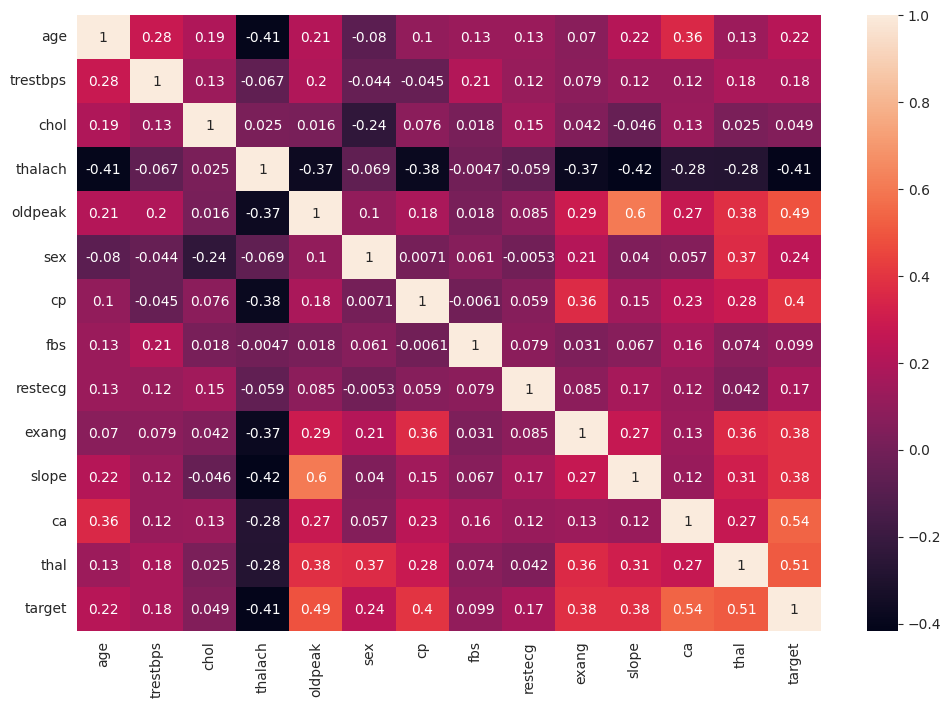

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True)

It is recognized that there are not much corellation between features, to specify the next step, the method of classify the data is applied

## 3. CLASSIFY THE IMPORTANT VALUE OF FEATURE BASED ON DECISION TREE

Because the data is cleaned and standardized, therefore we can use DT to classify the data following the result of target from train data, use validation set to predict the new value.

Method is to select `K` features which are most important for predict, K shall be specified as 5 first then add more feature if required

In [9]:
dt_para_grid = {
        "max_depth": 10,
        "min_samples_split": 20,
        "min_samples_leaf": 10,
        "criterion": "gini",
        "max_features": "sqrt",
        "random_state": 42
}
X_train = train_data.drop(columns="target")
y_train = train_data["target"]

decision_tree_classifier = DecisionTreeClassifier().fit(X_train, y_train)
important_features = pd.Series(decision_tree_classifier.feature_importances_, index = X_train.columns)
important_features_sorted = important_features.sort_values(ascending=False)
print(decision_tree_classifier.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


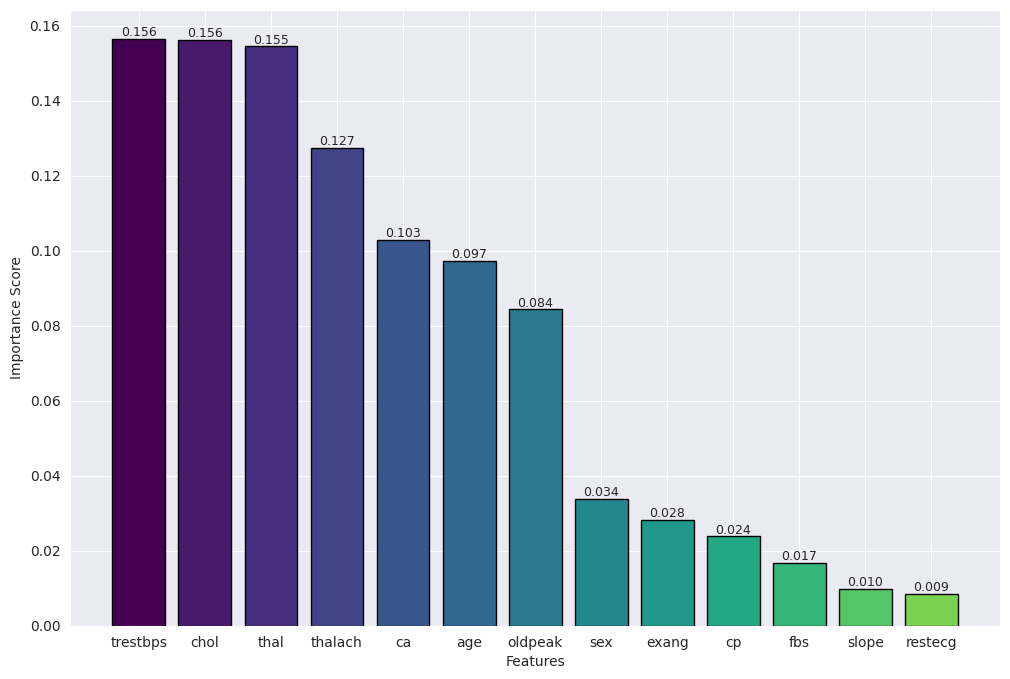

In [10]:
from src.data.data_visualization import bar_charts
bar_charts(important_features_sorted)

## 4. EXPORT TO CSV

Export the preprocessing to original and DT dataset with K = 10 important features

In [16]:
K = 10
topK_important_features = important_features_sorted.index[:K]
print(topK_important_features)
topK_dataset_odt_train = train_data[topK_important_features]
topK_dataset_odt_val = validation_data[topK_important_features]
topK_dataset_odt_test = test_data[topK_important_features]

topK_dataset_odt_train.head(10)

Index(['trestbps', 'chol', 'thal', 'thalach', 'ca', 'age', 'oldpeak', 'sex',
       'exang', 'cp'],
      dtype='object')


,trestbps,chol,thal,thalach,ca,age,oldpeak,sex,exang,cp
0,1.020911,0.169014,1.0,0.307680,0.666667,0.594945,1.320132,0.0,0.0,1.000000
1,0.463338,1.327117,0.0,1.411752,0.000000,-1.711319,-0.900796,1.0,0.0,0.666667
2,0.017280,0.720492,0.0,0.396006,0.333333,-0.063987,-0.900796,0.0,1.0,0.333333
3,-0.094234,-0.511143,1.0,0.572657,0.000000,0.155657,-0.900796,1.0,0.0,0.333333
4,-0.373021,0.095483,1.0,0.572657,0.666667,1.363700,-0.729955,1.0,0.0,1.000000
5,-0.094234,0.242544,0.0,0.219354,0.000000,0.045835,-0.900796,1.0,0.0,0.333333
6,-0.094234,0.077101,0.0,1.279263,0.000000,-0.832742,-0.900796,1.0,0.0,0.666667
7,-0.373021,0.169014,1.0,-0.398926,0.333333,0.594945,1.490973,1.0,1.0,1.000000
8,-1.766952,-0.014812,0.0,-1.238020,0.000000,0.375301,-0.046593,0.0,0.0,1.000000
9,2.136056,1.419030,1.0,-0.443089,0.000000,0.485123,2.003495,1.0,1.0,1.000000


In [17]:
dir_path = "../dataset/"
topK_dataset_odt_train.to_csv(dir_path + "topK_odt_train.csv", index=False)
topK_dataset_odt_val.to_csv(dir_path + "topK_odt_val.csv", index=False)
topK_dataset_odt_test.to_csv(dir_path + "topK_odt_test.csv", index=False)
print("✅ Save topK with Original + DecisionTree (odt) dataset to train, validation, test csv files successfully")

✅ Save topK with Original + DecisionTree (odt) dataset to train, validation, test csv files successfully
